In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

from pyolin.dataframe import GateData
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import score_heatmap
from pyolin.analysis import compatibility_heatmap
from pyolin.analysis import filter_valid
from pyolin.analysis import score_table
from pyolin.analysis import similarity_table
from pyolin.analysis import compatibility_table
from pyolin.analysis import all_paths

from pyolin.gate import Gate

import matplotlib.pyplot as plt
plt.ioff()

import pandas
raw = pandas.read_csv('../cyto2func/standardised_cheeky.csv').rename(columns={'rrpu': 'decomp_flor'}).rename(columns={'newstandard': 'rrpu'})
data = GateData(raw)

In [2]:
print(f"There are {len(data.contexts)} contexts in this data.")
contexts = data.contexts
contexts

There are 7 contexts in this data.


[('CC118Lpir', 'pSeva221'),
 ('CC118Lpir', 'pSeva231'),
 ('DH5alpha', 'pAN'),
 ('DH5alpha', 'pSeva221'),
 ('KT2440', 'pSeva221'),
 ('KT2440', 'pSeva231'),
 ('KT2440', 'pSeva251')]

In [3]:
from pyolin.analysis import analyse

for context in contexts:
    label = f"{context[0]}_{context[1]}"
    gates = data[context[0]:context[1]:]
    analyse(gates, label)

/home/mulciber/my/src/python/pyolin/pyolin/gate.py:76: RuntimeWarning: invalid value encountered in double_scalars
  return (k**n * (ymax - t * ymin) / (t * ymin - ymin))**(1 / n)
/home/mulciber/my/src/python/pyolin/pyolin/gate.py:63: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**n * ymax * (t - 1)) / (ymax - t * ymin))**(1 / n)


In [4]:
analyse(data[::], 'all_contexts')

In [5]:
for strain in data.strains:
    analyse(data[strain::], f"in_{strain}_only")

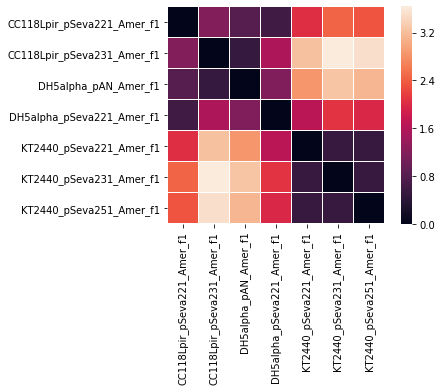

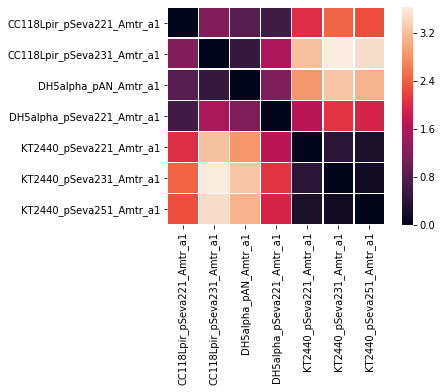

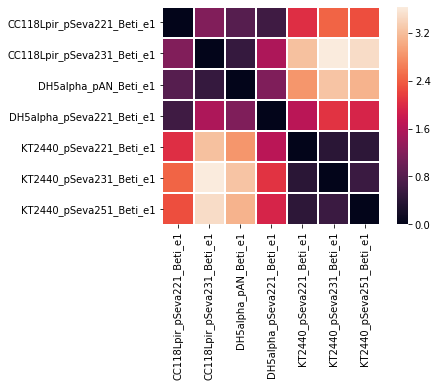

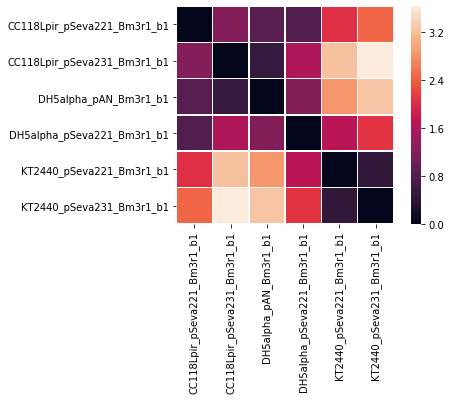

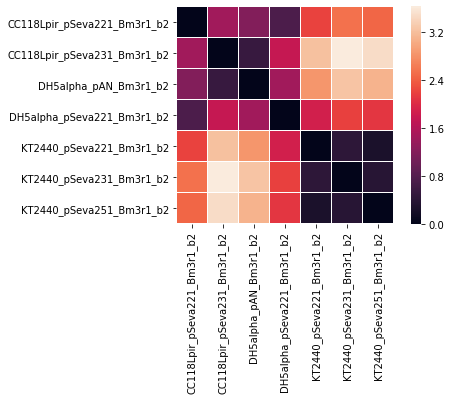

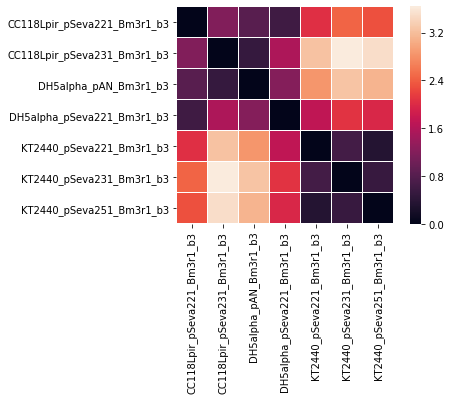

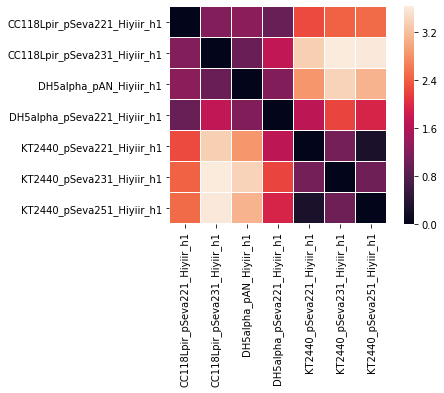

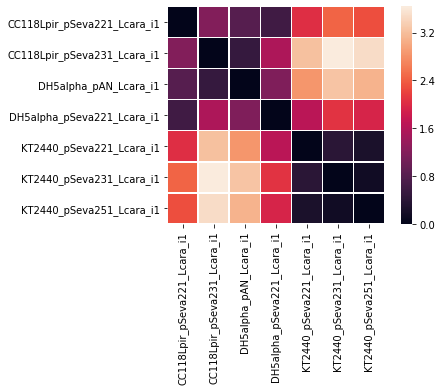

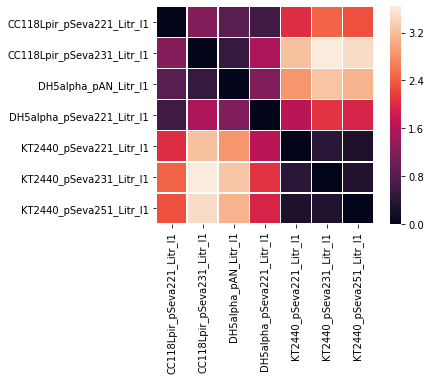

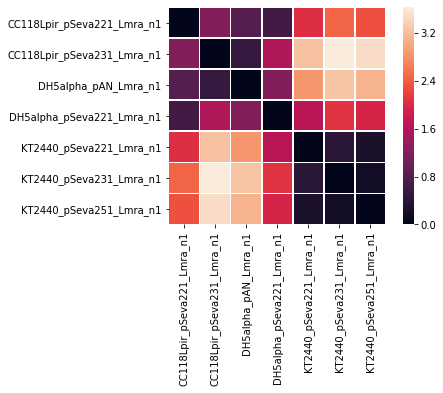

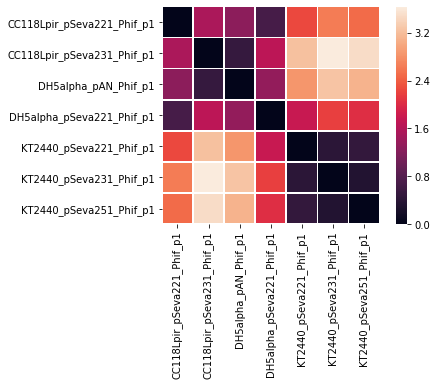

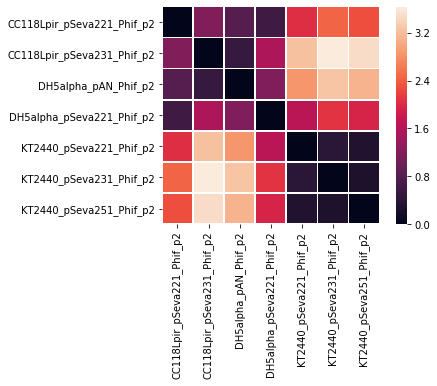

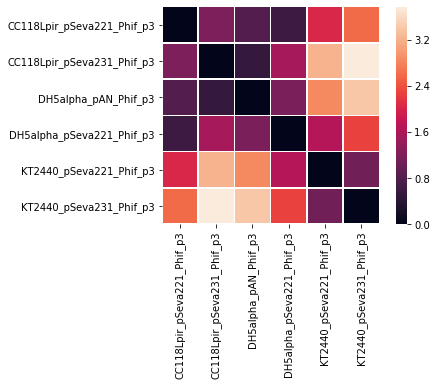

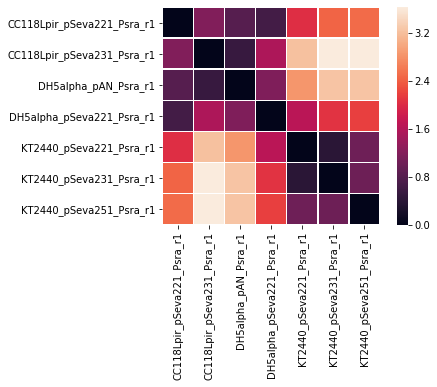

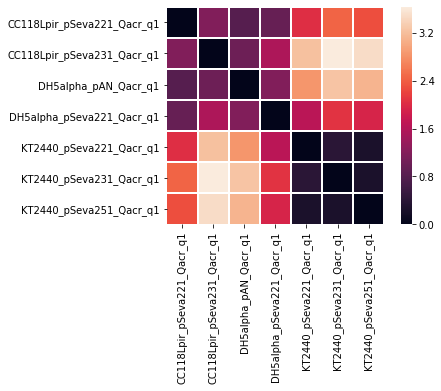

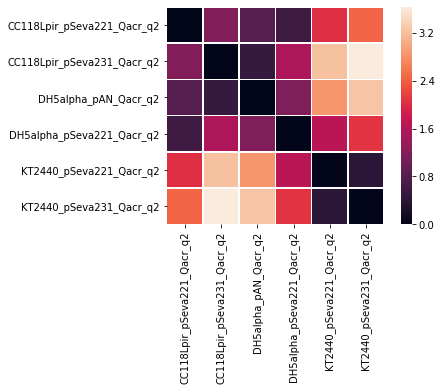

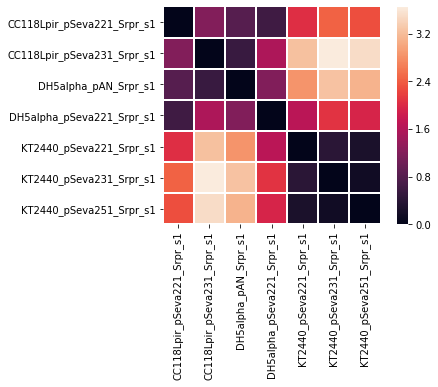

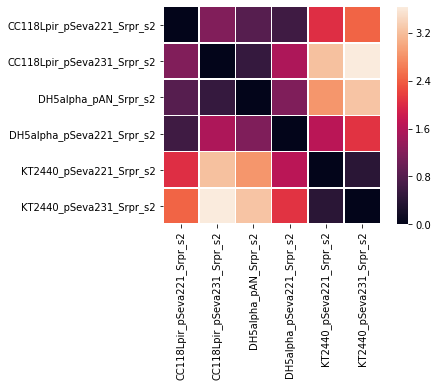

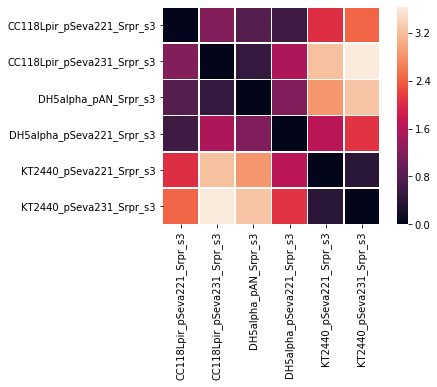

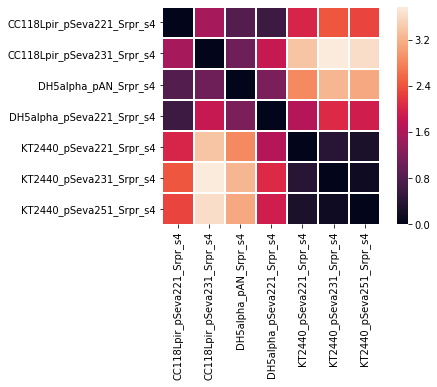

In [6]:
import seaborn

cargoes = data.plasmids[3:]
for cargo in cargoes:
    plt.figure()
    similarity_heatmap(data[::cargo])
    plt.savefig(f"results/similarity_heatmap_{cargo}_across_contexts.eps")